https://towardsdatascience.com/lstm-time-series-forecasting-predicting-stock-prices-using-an-lstm-model-6223e9644a2f
 


In [1]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

In [2]:
df=pd.read_csv("d:/TSLA1.csv")
print("Number of rows and columns:", df.shape)
df.head(5)

Number of rows and columns: (1259, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-10,262.220001,263.000000,257.820007,259.149994,259.149994,2610900
1,2015-07-13,262.250000,262.549988,256.049988,262.160004,262.160004,2960300
2,2015-07-14,262.100006,265.989990,260.510010,265.649994,265.649994,1907600
3,2015-07-15,266.739990,267.489990,262.079987,263.140015,263.140015,2021600
4,2015-07-16,264.220001,267.200012,263.160004,266.679993,266.679993,1616000


In [3]:
print("hello world")

hello world


**split the data into training and test sets to avoid overfitting**

In [4]:
training_set = df.iloc[:800, 1:2].values
test_set = df.iloc[800:, 1:2].values

**normalize the data before model fitting**

 lag of 1 day (lag 1)

In [5]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#(740, 60, 1)

build the model<br>
We will build the LSTM with 50 neurons and 4 hidden layers<br>
assign 1 neuron in the output layer for predicting the normalized stock price<br>
MSE loss function and the Adam stochastic gradient descent optimizer

In [6]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
24/24 [==============================] - 5s 191ms/step - loss: 0.0625
Epoch 2/100
24/24 [==============================] - 5s 218ms/step - loss: 0.0150
Epoch 3/100
24/24 [==============================] - 5s 219ms/step - loss: 0.0118
Epoch 4/100
24/24 [==============================] - 4s 177ms/step - loss: 0.0117
Epoch 5/100
24/24 [==============================] - 5s 204ms/step - loss: 0.0118
Epoch 6/100
24/24 [==============================] - 5s 202ms/step - loss: 0.0122
Epoch 7/100
24/24 [==============================] - 4s 160ms/step - loss: 0.0116
Epoch 8/100
24/24 [==============================] - 5s 197ms/step - loss: 0.0108
Epoch 9/100
24/24 [==============================] - 6s 250ms/step - loss: 0.0109
Epoch 10/100
24/24 [==============================] - 6s 232ms/step - loss: 0.0116
Epoch 11/100
24/24 [==============================] - 4s 169ms/step - loss: 0.0090
Epoch 12/100
24/24 [==============================] - 5s 210ms/step - loss: 0.0099
Epoch 13/100


Prepare the test data

In [7]:
# Getting the predicted stock price of 2017
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 519):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
# (459, 60, 1)

(459, 60, 1)


Make Predictions using the test set

In [8]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

visualize the results

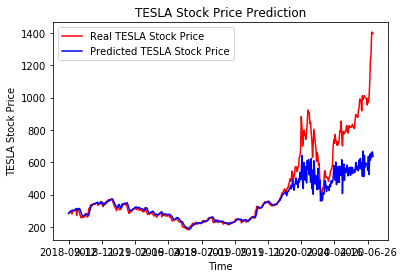

In [9]:
# Visualising the results
plt.plot(df.loc[800:, 'Date'],dataset_test.values, color = 'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[800:, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price')
plt.xticks(np.arange(0,459,50))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()
